In [10]:
import cv2
import zipfile
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [16]:
faces = {}
with zipfile.ZipFile("archive.zip") as facezip:
    for filename in facezip.namelist():
        if not filename.endswith(".pgm"):
            continue # not a face picture
        with facezip.open(filename) as image:
            # If we extracted files from zip, we can use cv2.imread(filename) instead
            faces[filename] = cv2.imdecode(np.frombuffer(image.read(), np.uint8), cv2.IMREAD_GRAYSCALE)

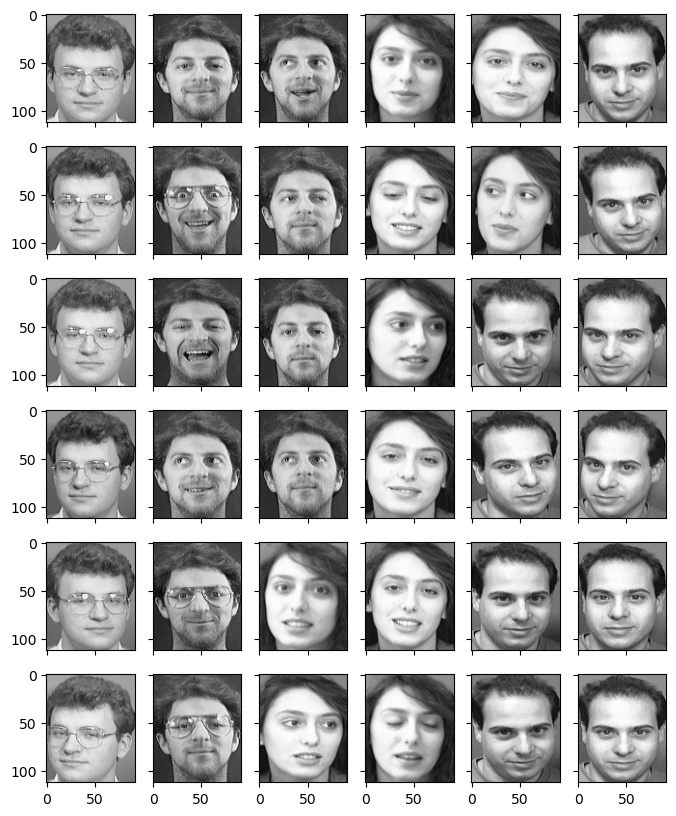

In [42]:
fig, axes = plt.subplots(6,6,sharex=True,sharey=True,figsize=(8,10))
faceimages = list(faces.values())[-36:] # take last 36 images
for i in range(36):
    axes[i%6][i//6].imshow(faceimages[i], cmap="gray")
plt.show()

In [18]:

faceshape = list(faces.values())[0].shape
print("Face image shape:", faceshape)
print(list(faces.keys())[:5])
classes = set(filename.split("/")[0] for filename in faces.keys())
print("Number of classes:", len(classes))
print("Number of pictures:", len(faces))

Face image shape: (112, 92)
['s1/1.pgm', 's1/10.pgm', 's1/2.pgm', 's1/3.pgm', 's1/4.pgm']
Number of classes: 40
Number of pictures: 400


In [40]:
# Take classes 1-39 for eigenfaces, keep entire class 40 and
# image 10 of class 39 as out-of-sample test
facematrix = []
facelabel = []
for key,val in faces.items():
    if key.startswith("s40/"):
        continue # this is our test set
    if key == "s39/10.pgm":
        continue # this is our test set
    facematrix.append(val.flatten())
    facelabel.append(key.split("/")[0])

# Create facematrix as (n_samples,n_pixels) matrix
facematrix = np.array(facematrix)

#run PCA
pca = PCA().fit(facematrix)


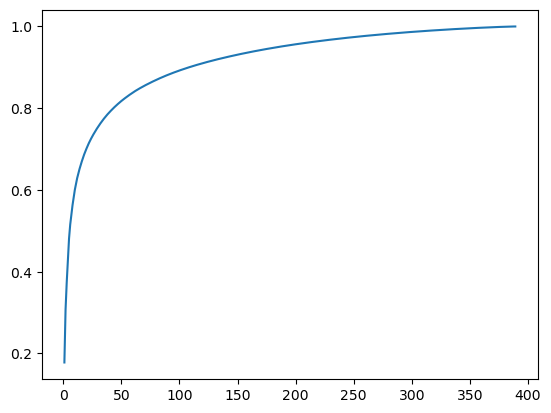

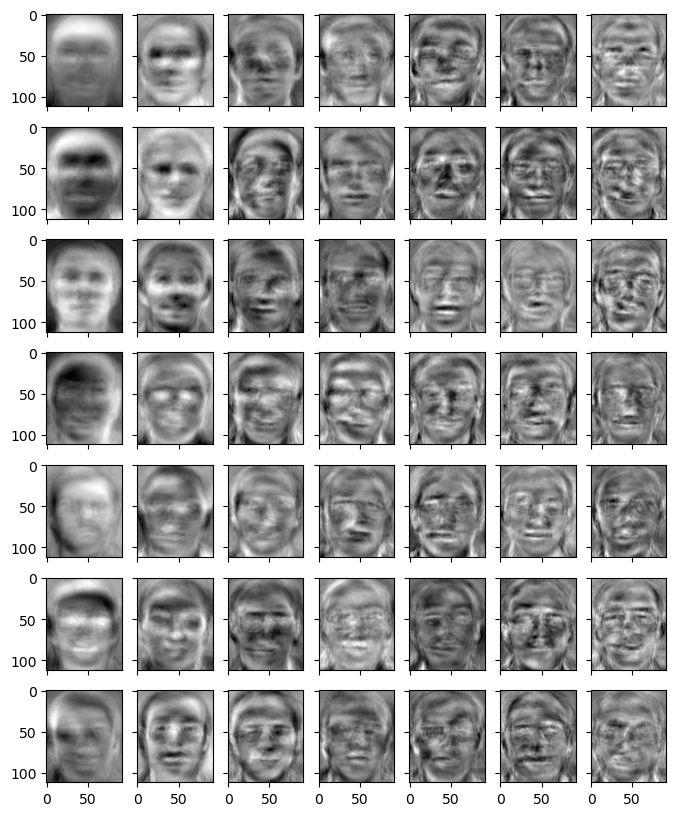

In [41]:
# print(np.cumsum(pca.explained_variance_ratio_))

x = np.linspace(1, np.prod(pca.explained_variance_ratio_.shape), np.prod(pca.explained_variance_ratio_.shape))
y = np.cumsum(pca.explained_variance_ratio_)

plt.plot(x, y)
plt.show()

# Take the first K principal components as eigenfaces
n_components = 50
eigenfaces = pca.components_[:n_components]
 
# Show the first 49 eigenfaces
fig, axes = plt.subplots(7,7,sharex=True,sharey=True,figsize=(8,10))
for i in range(49):
    axes[i%7][i//7].imshow(eigenfaces[i].reshape(faceshape), cmap="gray")
plt.show()